In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
r = 0.9
q = 0.8

w = np.zeros((2, 2))

w[0, 0] = 1 - q
w[0, 1] = r
w[1, 0] = q
w[1, 1] = 1 - r

nt = 20

pa = np.zeros((nt,))
pb = np.zeros((nt,))

pa[0] = np.random.rand()
pb[0] = 1 - pa[0]

for i in range(1, nt):
    pa[i] = w[0, 0] * pa[i - 1] + w[0, 1] * pb[i - 1]
    pb[i] = w[1, 0] * pa[i - 1] + w[1, 1] * pb[i - 1]

pai = r / (r + q)
pbi = q / (r + q)

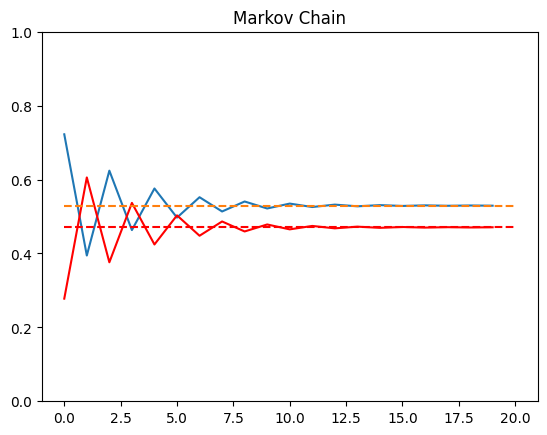

In [17]:
plt.plot(pa)
plt.plot(pb, color='red')
plt.plot([0, nt], [pai, pai], linestyle='dashed')
plt.plot([0, nt], [pbi, pbi], linestyle='dashed', color='red')
plt.title('Markov Chain')
plt.ylim(0, 1)
plt.show()

In [20]:
nr = 10000

d1 = np.empty((nr, nt), dtype='U1')
s1p = np.random.rand(nr)

astate = np.where(s1p < pa[0])[0]
bstate = np.where(s1p >= pa[0])[0]

d1[astate, 0] = 'a'
d1[bstate, 0] = 'b'

for i in range(1, nt):
    for j in range(nr):
        if d1[j, i - 1] == 'a':
            if np.random.rand() < q:
                d1[j, i] = 'b'
            else:
                d1[j, i] = 'a'
        if d1[j, i - 1] == 'b':
            if np.random.rand() < r:
                d1[j, i] = 'a'
            else:
                d1[j, i] = 'b'

psim = np.zeros((nt, 2))

for i in range(nt):
    psim[i, 0] = np.sum(d1[:, i] == 'a') / nr
    psim[i, 1] = np.sum(d1[:, i] == 'b') / nr

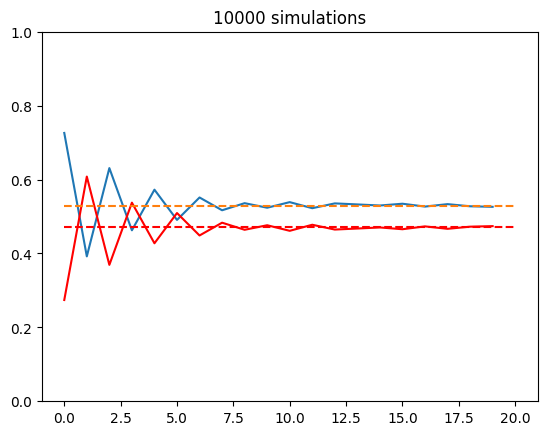

In [21]:
plt.plot(psim[:, 0])
plt.plot(psim[:, 1], color='red')
plt.plot([0, nt], [pai, pai], linestyle='dashed')
plt.plot([0, nt], [pbi, pbi], linestyle='dashed', color='red')
plt.title(f'{nr} simulations')
plt.ylim(0, 1)
plt.show()